## Introducción a las Redes Antagónicas Generativas (Generative Adversarial Networks - GANs)

Las **redes generativas antagónicas (GAN)**, introducidas en 2014 por [Ian Goodfellow et al., “Generative Adversarial Networks,” arXiv (2014)](https://arxiv.org/abs/1406.2661), son una **alternativa a las VAE** para el **aprendizaje de espacios latentes de imágenes**. Permiten la **generación de imágenes sintéticas bastante realistas** al **obligar a las imágenes generadas a ser estadísticamente casi indistinguibles de las reales**.

Una forma intuitiva de entender las GAN es: 
* **Imaginar a un falsificador tratando de crear una pintura falsa de Picasso**. **Al principio**, el falsificador es **bastante malo en la tarea**. **Mezcla** algunas de sus **falsificaciones** **con obras de Picasso auténticas** y se **las muestra** todas **a un marchante de arte**. 
* El **marchante de arte hace una evaluación de autenticidad** de cada pintura y le **da al falsificador información sobre lo que hace que un Picasso parezca un Picasso**. 
* **Falsificador** vuelve a su estudio para **preparar nuevas falsificaciones**. 
* A medida que **pasa el tiempo**, el **falsificador se vuelve cada vez más competente** para **imitar el estilo de Picasso**, y el **comerciante de arte se vuelve cada vez más experto en detectar falsificaciones**. 
* Al final, **tienen entre manos unos excelentes Picassos falsos**.

Eso es lo que es **una GAN**: **una red de falsificadores y una red de expertos**, **cada una entrenada para superar a la otra**. Como tal, una **GAN consta de dos partes**:
* **Red generadora**: **toma como entrada un vector aleatorio** (**un punto aleatorio en el espacio latente**) y **lo decodifica en una imagen sintética**. 
* **Red discriminadora** (o **adversario**): toma **como entrada una imagen** (**real** o **sintético**), y **predice si la imagen proviene del conjunto de entrenamiento** **o** fue **creada por la red generadora**

La **red generadora** está **entrenada** para poder **engañar a la red discriminadora** y, por lo tanto, **evoluciona hacia la generación de imágenes cada vez más realistas** a medida que avanza el entrenamiento: imágenes artificiales que parecen indistinguibles de las reales, hasta el punto de que es **imposible que la red discriminadora diferencie una de otra**. 

Mientras tanto, el **discriminador se adapta constantemente a las capacidades de mejora gradual del generador**, estableciendo un **alto nivel de realismo para las imágenes generadas**. 

Una vez que **finaliza el entrenamiento**, el **generador es capaz de convertir cualquier punto en su espacio de entrada en una imagen creíble**. **A diferencia de los VAE**, este **espacio latente** tiene menos garantías explícitas de estructura significativa; en particular, **no es continuo**.

**Un generador transforma vectores latentes aleatorios en imágenes, y un discriminador busca diferenciar las imágenes reales de las generadas. El generador está entrenado para engañar al discriminador**

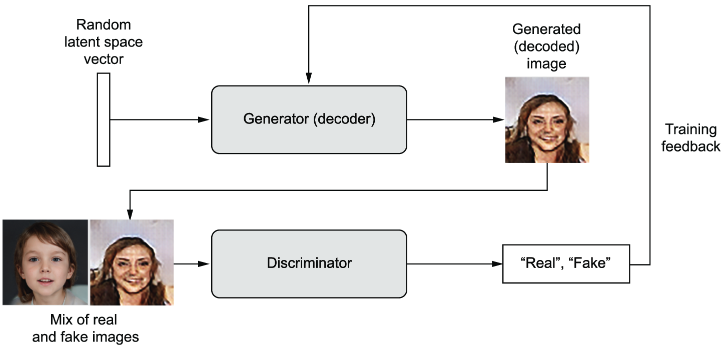

* Una **GAN** es un **sistema** donde **el mínimo de optimización no es fijo**, a diferencia de cualquier otra configuración de entrenamiento que hayamos visto.
* Es un **sistema dinámico** donde el **proceso de optimización no busca un mínimo**, sino un **equilibrio entre dos fuerzas**. 
* Es por ellos que **las GAN son difíciles de entrenar**: hacer que una GAN funcione requiere **muchos ajustes cuidadosos de la arquitectura** del modelo y los **parámetros de entrenamiento**.

### Una implementación esquemática de GAN

* Veremos cómo **implementar una GAN en Keras** en su **forma más básica**. 
* Las **GAN son avanzadas**, por lo que profundizar en los detalles técnicos de arquitecturas como la de **StyleGAN2** que generó las siguientes imágenes estaría fuera del alcance de este curso. 
* La implementación específica que usaremos es una **GAN convolucional profunda (DCGAN)**: una **GAN muy básica donde el generador y el discriminador son convnets profundas**.

**Habitantes del espacio latente. Imágenes generadas por https://thispersondoesnotexist.com utilizando un modelo StyleGAN2. (Crédito de la imagen: Phillip Wang es el autor del sitio web. El modelo utilizado es el modelo StyleGAN2 de Karras et al., https://arxiv.org/abs/1912.04958).**

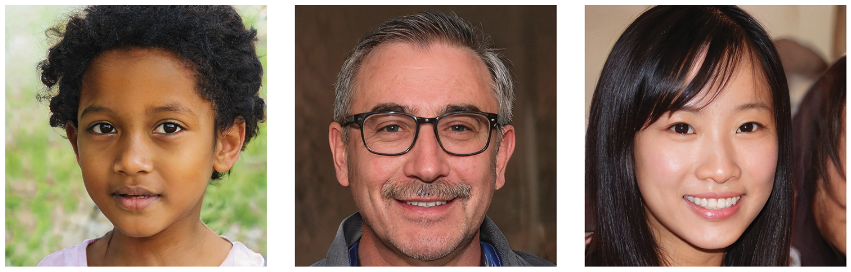

* **Entrenaremos nuestro GAN con** imágenes del dataset de atributos de CelebFaces a gran escala (conocido como **CelebA**), un conjunto de datos de 200.000 rostros de celebridades (http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 
* Para acelerar el entrenamiento, **cambiaremos el tamaño de las imágenes a 64 × 64**, por lo que **aprenderemos a generar imágenes de 64 × 64 de rostros humanos**.

Esquemáticamente, la **GAN** se vería así:

* Una red **``generator`` asigna vectores** de forma ``(latent_dim)`` **a imágenes** de forma ``(64, 64, 3)``.
* Una red **``discriminator`` asigna imágenes** de forma ``(64, 64, 3)`` **a** una **puntuación binaria** que estima la **probabilidad de que la imagen sea real**.
* Una **red ``gan`` encadena** el **generador** y el **discriminador**: **``gan(x) = discriminator(generator(x))``**. Por lo tanto, esta red ``gan`` mapea o **asigna vectores del espacio latente** a la **evaluación del discriminador del realismo de estos vectores latentes** tal **como los decodifica el generador**.
* **Entrenamos** al **discriminador** usando **ejemplos de imágenes reales y falsas** junto **con etiquetas "real"/"fake"**, tal como entrenamos cualquier modelo regular de clasificación de imágenes.
* Para **entrenar** al **generador**, **usamos** los **gradientes de los pesos del generador con respecto a la pérdida del modelo ``gan``**. Esto significa que **en cada paso**, **movemos los pesos del generador en una dirección que hace más probable que el discriminador clasifique como “real” las imágenes decodificadas por el generador**. En otras palabras, **entrenamos al generador para engañar al discriminador**.

### Una bolsa de trucos

**Entrenar** y **ajustar** las **redes GAN** es **difícil**, pero hay algunasn **heurísticas**, no pautas respaldadas por teorías, que **pueden ayudar como trucos**. Se sabe que **funcionan bien empíricamente**, aunque **no necesariamente en todos los contextos**.

**No** es una lista **exhaustiva**. Hay muchos más en la literatura de GAN:

* Usamos **strides** (zancadas) **en lugar de pooling** para reducir la resolución de los mapas de características **en el discriminador**. 
* **Muestreamos puntos del espacio latente** utilizando una **distribución normal** (distribución gaussiana), no una distribución uniforme. 
* La **estocasticidad** es **buena** para **inducir robustez**. Debido a que el **entrenamiento GAN da como resultado un equilibrio dinámico**, es probable que **las GAN se atasquen** de muchas maneras. Introducir la **aleatoriedad** durante el entrenamiento **ayuda a prevenir esto**. Introducimos la aleatoriedad **agregando ruido aleatorio a las etiquetas del discriminador**. 
* Los gradientes escasos (**sparse gradients**) pueden **dificultar el entrenamiento** de GAN. En el **deep learning**, la **escasez** suele ser una **propiedad deseable**, pero **no en las GAN**. Dos cosas pueden **inducir** la **escasez de gradiente**: Operaciones de **max pooling** y Activaciones  **``relu``**. **En lugar de max pooling**, se recomienda **usar strided convolutions para reducir la resolución** (downsampling), y usar una **capa ``LeakyReLU``** **en lugar de una activación ``relu``**. Es **similar a ``relu``, pero relaja las restricciones de escasez (sparsity constraints) al permitir pequeños valores de activación negativos**. 
* En las **imágenes generadas, es común ver artefactos de tablero de ajedrez causados por una cobertura desigual del espacio de píxeles en el generador**. Para arreglar esto, **usamos un tamaño de kernel que es divisible por el tamaño del stride cada vez que usamos ``Conv2DTranspose`` o ``Conv2D`` con stride tanto en el generador como en el discriminador**.

**Artefactos de tablero de ajedrez causados ​​por pasos y tamaños de kernel que no coinciden, lo que da como resultado una cobertura de espacio de píxeles desigual: una de las muchas trampas de las GAN**

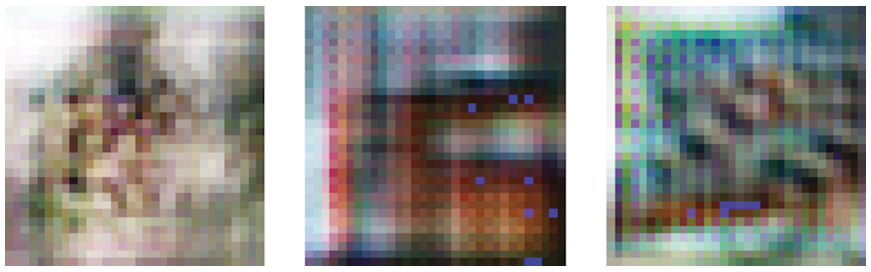

### Metiendo mano en el conjunto de datos de CelebA

Conjunto de datos: http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html:

**Obteniendo los datos de CelebA**

In [1]:
# Creamos el directorio de trabajo
!mkdir celeba_gan
# Descargamos los datos comprimidos usando 
# gdown (disponible de forma predeterminada 
# en Colab; de lo contrario, instaladlo)
!gdown --id 1O7m1010EJjLE5QxLZiM9Fpjs7Oj6e684 -O celeba_gan/data.zip
# Descomprimimos los datos
!unzip -qq celeba_gan/data.zip -d celeba_gan

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1O7m1010EJjLE5QxLZiM9Fpjs7Oj6e684
To: /content/celeba_gan/data.zip
100% 1.44G/1.44G [00:06<00:00, 231MB/s]


Usamos **``image_dataset_from_directory`` para convertirlo en un dataset.** Dado que **solo necesitamos las imágenes, no hay etiquetas**, especificaremos **``label_mode=None``**.

**Creamos un dataset a partir de un directorio de imágenes**

In [2]:
from tensorflow import keras
dataset = keras.utils.image_dataset_from_directory(
    "celeba_gan",
    # Solo se devolverán las imágenes, sin etiquetas.
    label_mode=None,
    image_size=(64, 64),
    batch_size=32,
    # Cambiaremos el tamaño de las imágenes a 64 × 64 
    # usando una combinación inteligente de recorte y 
    # cambio de tamaño para preservar la relación de 
    # aspecto. ¡No queremos que las proporciones 
    # de la cara se distorsionen!
    smart_resize=True)

Found 202599 files belonging to 1 classes.


Finalmente, cambiamos la **escala de las imágenes al rango ``[0-1]``**

**Rescalamos las imágenes**

In [3]:
dataset = dataset.map(lambda x: x / 255.)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


**Mostramos la primera imagen**

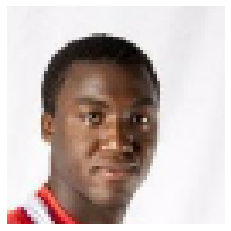

In [4]:
import matplotlib.pyplot as plt
for x in dataset:
    plt.axis("off")
    plt.imshow((x.numpy() * 255).astype("int32")[0])
    break

### El discriminator

**Modelo ``discriminator``**: **toma** como entrada una **imagen candidata** (real o sintética) **y la clasifica** en una de dos clases: **"generated image"** o **"real image that comes from the training set"**. 

Uno de los muchos **problemas** que surgen comúnmente **con las GAN** es que el **generador se atasca con imágenes generadas que parecen ruido**. Una posible solución es **usar dropout en el discriminador**, eso es lo que haremos aquí.

**La red discriminadora (discriminator) GAN**

In [5]:
from tensorflow.keras import layers

discriminator = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        # Una capa de Dropout: ¡un truco importante!
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)

In [6]:
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         262272    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 flatten (Flatten)           (None, 8192)            

### El generator

Modelo ``generator``: **convierta un vector** (desde el espacio latente; durante el entrenamiento se muestreará al azar) **en una imagen candidata**.

**La Red Generadora GAN**

In [7]:
# El espacio latente estará formado por vectores de 128 dimensiones.
latent_dim = 128

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        # Producimos la misma cantidad de coeficientes que teníamos 
        # al nivel de la capa Flatten en el codificador.
        layers.Dense(8 * 8 * 128),
        # Revertimos la capa Flatten del codificador
        layers.Reshape((8, 8, 128)),
        # Revertimos las capas Conv2D del codificador.
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        # Usamos LeakyReLU como nuestra activación 
        layers.LeakyReLU(alpha=0.2),
        # Revertimos las capas Conv2D del codificador.
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        # Usamos LeakyReLU como nuestra activación 
        layers.LeakyReLU(alpha=0.2),
        # Revertimos las capas Conv2D del codificador.
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        # Usamos LeakyReLU como nuestra activación 
        layers.LeakyReLU(alpha=0.2),
        # La salida termina con la forma (28, 28, 1)
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ],
    name="generator",
)

In [8]:
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8192)              1056768   
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 256)      524544    
 ranspose)                                                       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 256)       0 

### La Red Antagónica (Adversarial)

Finalmente, **configuraremos el GAN**, que **encadena el generador y el discriminador**. Cuando **se entrena**, **este modelo moverá el generador en una dirección que mejora su capacidad para engañar al discriminador**. El **modelo convierte los puntos de espacio latente en una decisión de clasificación**, "fake" o "real", y **está destinado a ser entrenado con etiquetas** que siempre son **"estas son imágenes reales"**. Entonces, **el ``gan`` de entrenamiento actualizará los pesos del ``generator`` de una manera que hace que el ``discriminator`` sea más probable que prediga "real" cuando mira imágenes falsas**.

**Ciclo de entranamiento esquemático**. Para cada época, hacemos lo siguiente:
1. **Dibujar puntos aleatorios en el espacio latente** (**ruido aleatorio**). 
2. **Generamos imágenes con ``generator`` usando este ruido aleatorio**. 
3. **Mezclamos** las **imágenes generadas** **con** las **reales**. 
4. **Entrenamos al ``discriminator``** utilizando estas **imágenes mezcladas**, **con los objetivos correspondientes**: ya sea "**real**" (para las imágenes reales) o "**fake**" (para las **imágenes generadas**). 
5. **Dibujamos nuevos puntos aleatorios en el espacio latente**. 
6. **Entrenamos el ´´generator´´ usando estos vectores aleatorios**, con **objetivos que dicen "estas son imágenes reales"**. **Esto actualiza los pesos del generador para moverlos para que el discriminador prediga "estas son imágenes reales" para las imágenes generadas: esto entrena al generador para engañar al discriminador**.

* Lo implementamos usando una **subclase de ``Model`` con un ``train_step()`` personalizado** (como hicimos con VAE)
* Usaremos **dos optimizadores** (uno para el **generador** y otro para el **discriminador**), por lo que también **sobreescribiremos ``compile()`` para permitir el paso de los dos optimizadores**.

**El `Model` GAN**

In [9]:
import tensorflow as tf
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        # Configura métricas para rastrear las dos 
        # pérdidas en cada época de entrenamiento
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # Muestrea puntos aleatorios en el espacio latente
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(
            shape=(batch_size, self.latent_dim))
        # Los decodifica a imágenes falsas
        generated_images = self.generator(random_latent_vectors)
        # Los combina con imágenes reales
        combined_images = tf.concat([generated_images, real_images], axis=0)
        # Ensambla etiquetas, discriminando imágenes reales de falsas
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))],
            axis=0
        )
        # Agrega ruido aleatorio a las etiquetas: ¡un truco importante!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Entrenamos al discriminador
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        random_latent_vectors = tf.random.normal(
            # Muestrea puntos aleatorios en el espacio latente
            shape=(batch_size, self.latent_dim))

        # Ensambla etiquetas de imágenes reales
        misleading_labels = tf.zeros((batch_size, 1))

        # Entrena al generador
        with tf.GradientTape() as tape:
            predictions = self.discriminator(
                self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(
            zip(grads, self.generator.trainable_weights))

        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {"d_loss": self.d_loss_metric.result(),
                "g_loss": self.g_loss_metric.result()}

**Antes** **de** comenzar a **entrenar**, **configuramos una callback para monitorizar nuestros resultados**: **usará el generador para crear y guardar una cantidad de imágenes falsas al final de cada época**.

**Una callback que muestra imágenes generadas durante el entrenamiento**

In [10]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = keras.utils.array_to_img(generated_images[i])
            img.save(f"generated_img_{epoch:03d}_{i}.png")

Finalmente, podemos comenzar a entrenar

**Compilando y entrenando la GAN**

In [ ]:
# Comenzaremos a obtener resultados interesantes después de la época 20.
epochs = 100

gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

gan.fit(
    dataset, epochs=epochs, callbacks=[GANMonitor(num_img=10, latent_dim=latent_dim)]
)

Epoch 1/100
6332/6332 [==============================] - 1768s 277ms/step - d_loss: 0.6143 - g_loss: 1.1678
Epoch 2/100
6332/6332 [==============================] - 1745s 276ms/step - d_loss: 0.6601 - g_loss: 1.0082
Epoch 3/100
6332/6332 [==============================] - 1746s 276ms/step - d_loss: 0.6635 - g_loss: 1.0230
Epoch 4/100
6332/6332 [==============================] - 1739s 275ms/step - d_loss: 0.6517 - g_loss: 1.0456
Epoch 5/100
6332/6332 [==============================] - 1744s 275ms/step - d_loss: 0.6515 - g_loss: 1.0340
Epoch 6/100
6332/6332 [==============================] - 1742s 275ms/step - d_loss: 0.6564 - g_loss: 0.9885
Epoch 7/100
6332/6332 [==============================] - 1741s 275ms/step - d_loss: 0.6690 - g_loss: 0.9545
Epoch 8/100
 806/6332 [==>...........................] - ETA: 25:21 - d_loss: 0.6949 - g_loss: 0.9564

Durante el **entrenamiento**, es posible que observemos que la pérdida adversaria (**adversarial loss**) **comienza a aumentar** considerablemente, mientras que la pérdida discriminatoria (**discriminative loss**) **tiende a cero**: **el discriminador puede terminar dominando al generador**. Si ese es el caso, podemos **intentar reducir la tasa de aprendizaje del discriminador** y **aumentar el dropout del discriminador**. 

**Algunas imágenes generadas alrededor de la época 30**

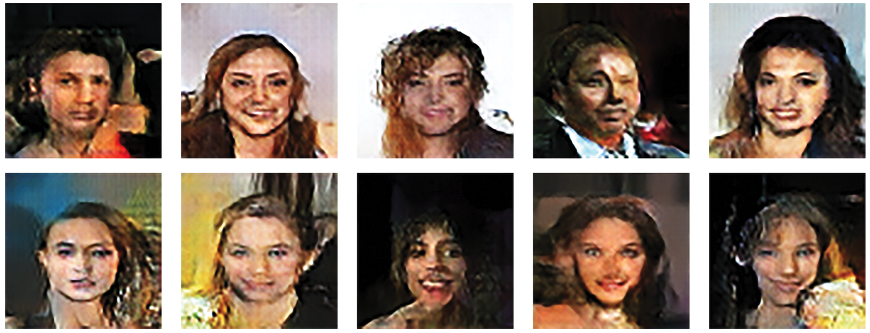

### Resumen GAN

* Una **GAN** consta de una **red generadora junto con una red discriminadora**. El **discriminador se entrena para diferenciar entre la salida del generador y las imágenes reales de un conjunto de datos de entrenamiento**, y el **generador se entrena para engañar al discriminador**. Sorprendentemente, **el generador nunca ve imágenes del conjunto de entrenamiento directamente**; **la información que tiene sobre los datos proviene del discriminador**. 
* Las **GAN** son **difíciles de entrenar**: **proceso dinámico en lugar de un simple proceso de descenso de gradiente** con un panorama de **pérdidas fijas**. Lograr que una GAN se entrene correctamente requiere el uso de una serie de trucos heurísticos, así como una gran cantidad de ajustes. 
* Las **GAN pueden producir potencialmente imágenes muy realistas**. Pero a diferencia de los VAE, **el espacio latente que aprenden no tiene una estructura continua ordenada** y, por lo tanto, **puede no ser adecuado para ciertas aplicaciones prácticas, como la edición de imágenes a través de vectores de concepto de espacio latente**. 

Estas pocas técnicas cubren solo los **conceptos básicos** de este campo en rápida expansión. Hay mucho más por descubrir: el **aprendizaje profundo generativo merece un libro completo**.

## Resumen Final Deep Learning Generativo

* Podemos usar un **modelo de secuencia-a-secuencia** para **generar datos de secuencia**, un paso a la vez. Esto es aplicable a la **generación de texto**, pero también a la generación de **música** nota por nota o **cualquier otro tipo de datos de series temporales**. 
* **DeepDream** funciona **maximizando las activaciones de la capa de convnet a través del ascenso de gradiente en el espacio de entrada**. 
* En el **algoritmo de transferencia de estilo**, una **imagen de contenido** y una **imagen de estilo** se **combinan mediante un descenso de gradiente** para **producir una imagen con las características de alto nivel de la imagen de contenido** y las **características locales de la imagen de estilo**. 
* **VAE** y **GAN** son modelos que **aprenden un espacio latente de imágenes** y luego **pueden soñar con imágenes completamente nuevas al tomar muestras del espacio latente**. Los **vectores conceptuales** en el espacio latente pueden incluso **usarse para la edición de imágenes**.